In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

In [5]:
adata = sc.read_h5ad('datasets/slidetag_LN/slidetag_LN.h5ad')
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)

import os
from pathlib import Path
directory = Path('Benchmarking_results/slidetag')
glb = directory.rglob('*.npy')
files = [str(file) for file in glb if file.is_file()]
file_list = sorted(files)

for filename in file_list:
    name = filename[30:-4]
    adata.obsm[name] = np.load(filename)
    
for i in range(10):
    adata.obsm['GraphST'+str(i)] = sc.pp.pca(adata.obsm['GraphST'+str(i)])


from simvi.model import SimVI
edge_index = SimVI.extract_edge_index(adata,n_neighbors=10)
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix
coo = coo_matrix((np.ones(edge_index[0].shape[0]), (edge_index[0].numpy(), edge_index[1].numpy())), shape=(adata.shape[0],adata.shape[0]))
for i in range(10):
    adata.obsm['scviavg'+str(i)] = 0.1 * coo.toarray() @ adata.obsm['scvi'+str(i)]
    adata.obsm['cellcharter'+str(i)] = np.hstack((adata.obsm['scvi'+str(i)],adata.obsm['scviavg'+str(i)]))

Global seed set to 0


In [6]:
adata

AnnData object with n_obs × n_vars = 5778 × 4000
    obs: 'cell_type'
    var: 'gene_ids', 'feature_types'
    uns: 'cell_type_colors', 'log1p', 'pca'
    obsm: 'spatial', 'X_pca', 'GraphST0', 'GraphST1', 'GraphST2', 'GraphST3', 'GraphST4', 'GraphST5', 'GraphST6', 'GraphST7', 'GraphST8', 'GraphST9', 'STAGATE0', 'STAGATE1', 'STAGATE2', 'STAGATE3', 'STAGATE4', 'STAGATE5', 'STAGATE6', 'STAGATE7', 'STAGATE8', 'STAGATE9', 'nsf_s0', 'nsf_s1', 'nsf_s2', 'nsf_s3', 'nsf_s4', 'nsf_s5', 'nsf_s6', 'nsf_s7', 'nsf_s8', 'nsf_s9', 'nsf_z0', 'nsf_z1', 'nsf_z2', 'nsf_z3', 'nsf_z4', 'nsf_z5', 'nsf_z6', 'nsf_z7', 'nsf_z8', 'nsf_z9', 'scvi0', 'scvi1', 'scvi2', 'scvi3', 'scvi4', 'scvi5', 'scvi6', 'scvi7', 'scvi8', 'scvi9', 'simvi_0', 'simvi_1', 'simvi_2', 'simvi_3', 'simvi_4', 'simvi_5', 'simvi_6', 'simvi_7', 'simvi_8', 'simvi_9', 'simvi_lz0', 'simvi_lz1', 'simvi_lz2', 'simvi_lz3', 'simvi_lz4', 'simvi_lz5', 'simvi_lz6', 'simvi_lz7', 'simvi_lz8', 'simvi_lz9', 'simvi_s0', 'simvi_s1', 'simvi_s2', 'simvi_s3', '

In [7]:
adata_gc_ = sc.read_h5ad('LN_GC.h5ad')
adata_gc_

AnnData object with n_obs × n_vars = 1475 × 4000
    obs: 'cell_type', '_scvi_batch', '_scvi_labels', 'leiden', 'SIMVI niche', 'Niche_', 'CXCR4_', 'Phase', 'DZ_likelihood', 'CXCR4_likelihood'
    var: 'gene_ids', 'feature_types'
    uns: 'Phase_colors', 'SIMVI niche_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'Kernel_pca', 'X_pca', 'X_umap', 'isomap', 'simvi', 'simvi_', 'simvi_lz', 'simvi_s', 'simvi_z', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata_gc = adata[adata_gc_.obs_names].copy()
adata_gc.obs['Phase'] = adata_gc_.obs['Phase'].values.copy()
adata_gc

AnnData object with n_obs × n_vars = 1475 × 4000
    obs: 'cell_type', 'Phase'
    var: 'gene_ids', 'feature_types'
    uns: 'cell_type_colors', 'log1p', 'pca'
    obsm: 'spatial', 'X_pca', 'GraphST0', 'GraphST1', 'GraphST2', 'GraphST3', 'GraphST4', 'GraphST5', 'GraphST6', 'GraphST7', 'GraphST8', 'GraphST9', 'STAGATE0', 'STAGATE1', 'STAGATE2', 'STAGATE3', 'STAGATE4', 'STAGATE5', 'STAGATE6', 'STAGATE7', 'STAGATE8', 'STAGATE9', 'nsf_s0', 'nsf_s1', 'nsf_s2', 'nsf_s3', 'nsf_s4', 'nsf_s5', 'nsf_s6', 'nsf_s7', 'nsf_s8', 'nsf_s9', 'nsf_z0', 'nsf_z1', 'nsf_z2', 'nsf_z3', 'nsf_z4', 'nsf_z5', 'nsf_z6', 'nsf_z7', 'nsf_z8', 'nsf_z9', 'scvi0', 'scvi1', 'scvi2', 'scvi3', 'scvi4', 'scvi5', 'scvi6', 'scvi7', 'scvi8', 'scvi9', 'simvi_0', 'simvi_1', 'simvi_2', 'simvi_3', 'simvi_4', 'simvi_5', 'simvi_6', 'simvi_7', 'simvi_8', 'simvi_9', 'simvi_lz0', 'simvi_lz1', 'simvi_lz2', 'simvi_lz3', 'simvi_lz4', 'simvi_lz5', 'simvi_lz6', 'simvi_lz7', 'simvi_lz8', 'simvi_lz9', 'simvi_s0', 'simvi_s1', 'simvi_s2', 'sim

In [13]:
s_list = [file[30:-4] for file in file_list]
s_list.extend(['cellcharter'+str(i) for i in range(10)])
nsf_z = ['nsf_z'+str(i) for i in range(10)]

s_list = [item for item in s_list if item not in nsf_z]
s_list.append('X_pca')
s_list

['GraphST0',
 'GraphST1',
 'GraphST2',
 'GraphST3',
 'GraphST4',
 'GraphST5',
 'GraphST6',
 'GraphST7',
 'GraphST8',
 'GraphST9',
 'STAGATE0',
 'STAGATE1',
 'STAGATE2',
 'STAGATE3',
 'STAGATE4',
 'STAGATE5',
 'STAGATE6',
 'STAGATE7',
 'STAGATE8',
 'STAGATE9',
 'nsf_s0',
 'nsf_s1',
 'nsf_s2',
 'nsf_s3',
 'nsf_s4',
 'nsf_s5',
 'nsf_s6',
 'nsf_s7',
 'nsf_s8',
 'nsf_s9',
 'scvi0',
 'scvi1',
 'scvi2',
 'scvi3',
 'scvi4',
 'scvi5',
 'scvi6',
 'scvi7',
 'scvi8',
 'scvi9',
 'simvi_0',
 'simvi_1',
 'simvi_2',
 'simvi_3',
 'simvi_4',
 'simvi_5',
 'simvi_6',
 'simvi_7',
 'simvi_8',
 'simvi_9',
 'simvi_lz0',
 'simvi_lz1',
 'simvi_lz2',
 'simvi_lz3',
 'simvi_lz4',
 'simvi_lz5',
 'simvi_lz6',
 'simvi_lz7',
 'simvi_lz8',
 'simvi_lz9',
 'simvi_s0',
 'simvi_s1',
 'simvi_s2',
 'simvi_s3',
 'simvi_s4',
 'simvi_s5',
 'simvi_s6',
 'simvi_s7',
 'simvi_s8',
 'simvi_s9',
 'simvi_z0',
 'simvi_z1',
 'simvi_z2',
 'simvi_z3',
 'simvi_z4',
 'simvi_z5',
 'simvi_z6',
 'simvi_z7',
 'simvi_z8',
 'simvi_z9',
 'simvigo_

In [14]:
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection
biocons = BioConservation(isolated_labels=False,nmi_ari_cluster_labels_leiden=True,nmi_ari_cluster_labels_kmeans=False,clisi_knn=False)
bat = BatchCorrection(silhouette_batch = False, ilisi_knn=False, kbet_per_label = False, graph_connectivity = False, pcr_comparison=False)

bm = Benchmarker(
    adata_gc,
    batch_key="cell_type",
    label_key="Phase",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat,
    n_jobs=20,
)
bm.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:  10%|█████████████████▍                                                                                                                                                            | 1/10 [00:00<00:03,  2.72it/s, Bio conservation: silhouette_label]No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                             

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

In [29]:
bm._results.to_csv('Benchmarking_results/slidetag_phase.csv')

In [33]:
adata.obs['SIMVI niche'] = pd.read_csv('Bio_results/slidetag/adata_obs.csv')['SIMVI niche'].values.copy()

In [34]:
bm2 = Benchmarker(
    adata,
    batch_key="SIMVI niche",
    label_key="cell_type",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat,
    n_jobs=20,
)
bm2.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          

In [35]:
bm2._results.to_csv('Benchmarking_results/slidetag_ct.csv')

In [36]:
bm3 = Benchmarker(
    adata,
    batch_key="cell_type",
    label_key="SIMVI niche",
    embedding_obsm_keys=s_list,
    pre_integrated_embedding_obsm_key='X_pca',
    bio_conservation_metrics=biocons,
    batch_correction_metrics=bat,
    n_jobs=20,
)
bm3.benchmark()

/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self._emb_adatas[emb_key] = AnnData(self._adata.obsm[emb_key], obs=self._adata.obs)
/usr/local/lib/python3.8/dist-packages/scib_metrics/benchmark/_core.py:178: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                                               
Metrics:   0%|                                                                                                                                                                                                                          | 0/10 [00:00<?, ?it/s]
                                                                                                                                                                                                                                        

In [37]:
bm3._results.to_csv('Benchmarking_results/slidetag_niche.csv')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


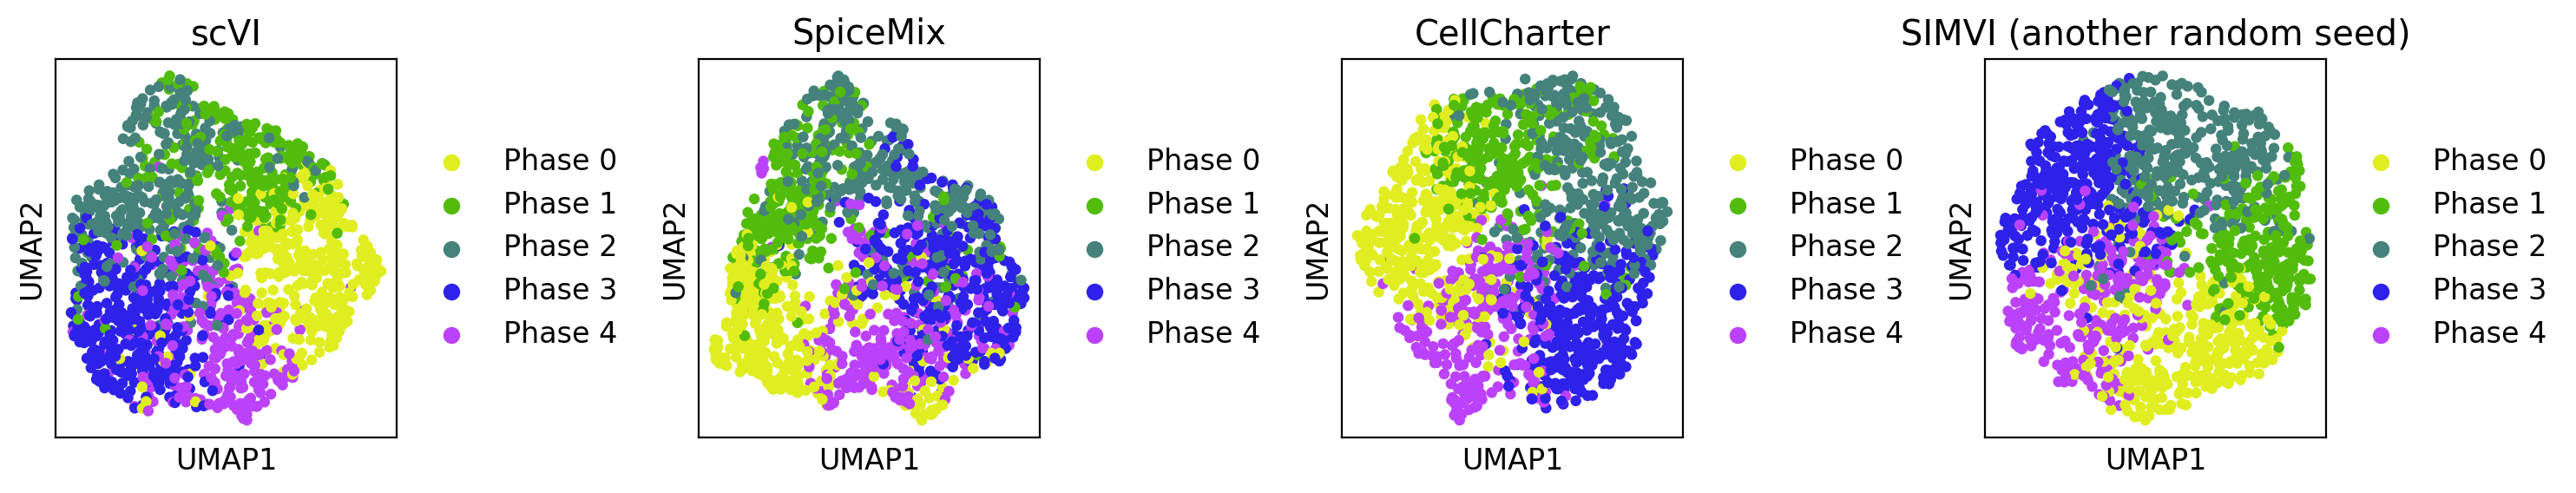

In [43]:
adata_gc.uns['Phase_colors'] = ['#e0ed20', '#52bc0c', '#45827c', '#2e21ea', '#bb42fa', '#fba0b2']


import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams["font.size"] = 12


fig, axes = plt.subplots(1,4,figsize=(15,3))

sc.pp.neighbors(adata_gc,use_rep='scvi0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='scVI',show=False,ax=axes[0])

sc.pp.neighbors(adata_gc,use_rep='spicemix0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='SpiceMix',show=False,ax=axes[1])

sc.pp.neighbors(adata_gc,use_rep='cellcharter0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='CellCharter',show=False,ax=axes[2])

sc.pp.neighbors(adata_gc,use_rep='simvi_0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='SIMVI (another random seed)',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_gc_comparison.pdf')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


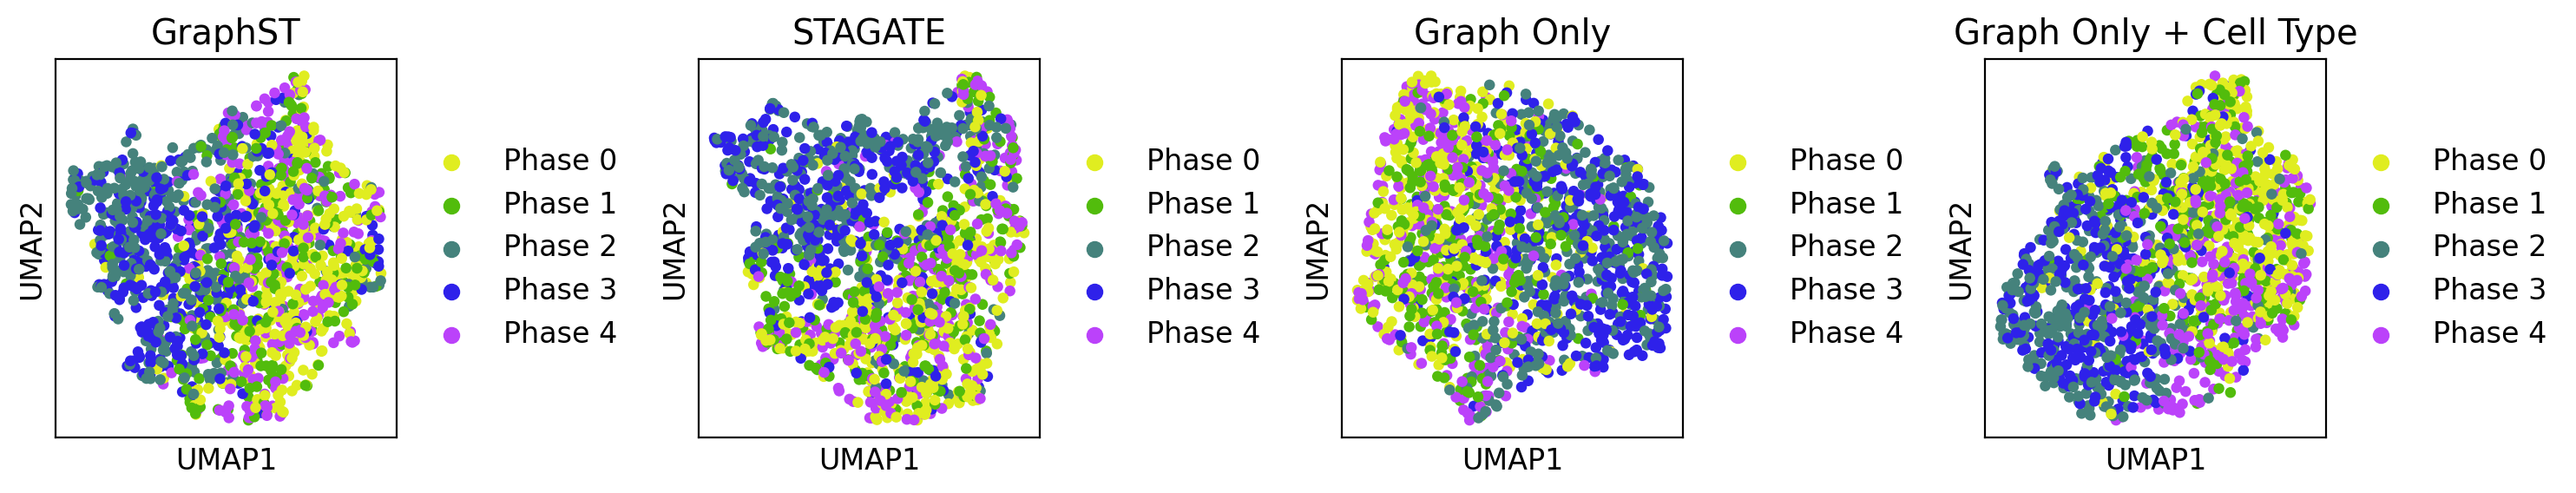

In [48]:
fig, axes = plt.subplots(1,4,figsize=(15,3))
sc.pp.neighbors(adata_gc,use_rep='GraphST0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='GraphST',show=False,ax=axes[0])

sc.pp.neighbors(adata_gc,use_rep='STAGATE0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='STAGATE',show=False,ax=axes[1])

sc.pp.neighbors(adata_gc,use_rep='simvigo_s0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='Graph Only',show=False,ax=axes[2])

sc.pp.neighbors(adata_gc,use_rep='simvigoct_s0')
sc.tl.umap(adata_gc)
sc.pl.umap(adata_gc,color='Phase',title='Graph Only + Cell Type',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_gc_comparison2.pdf')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


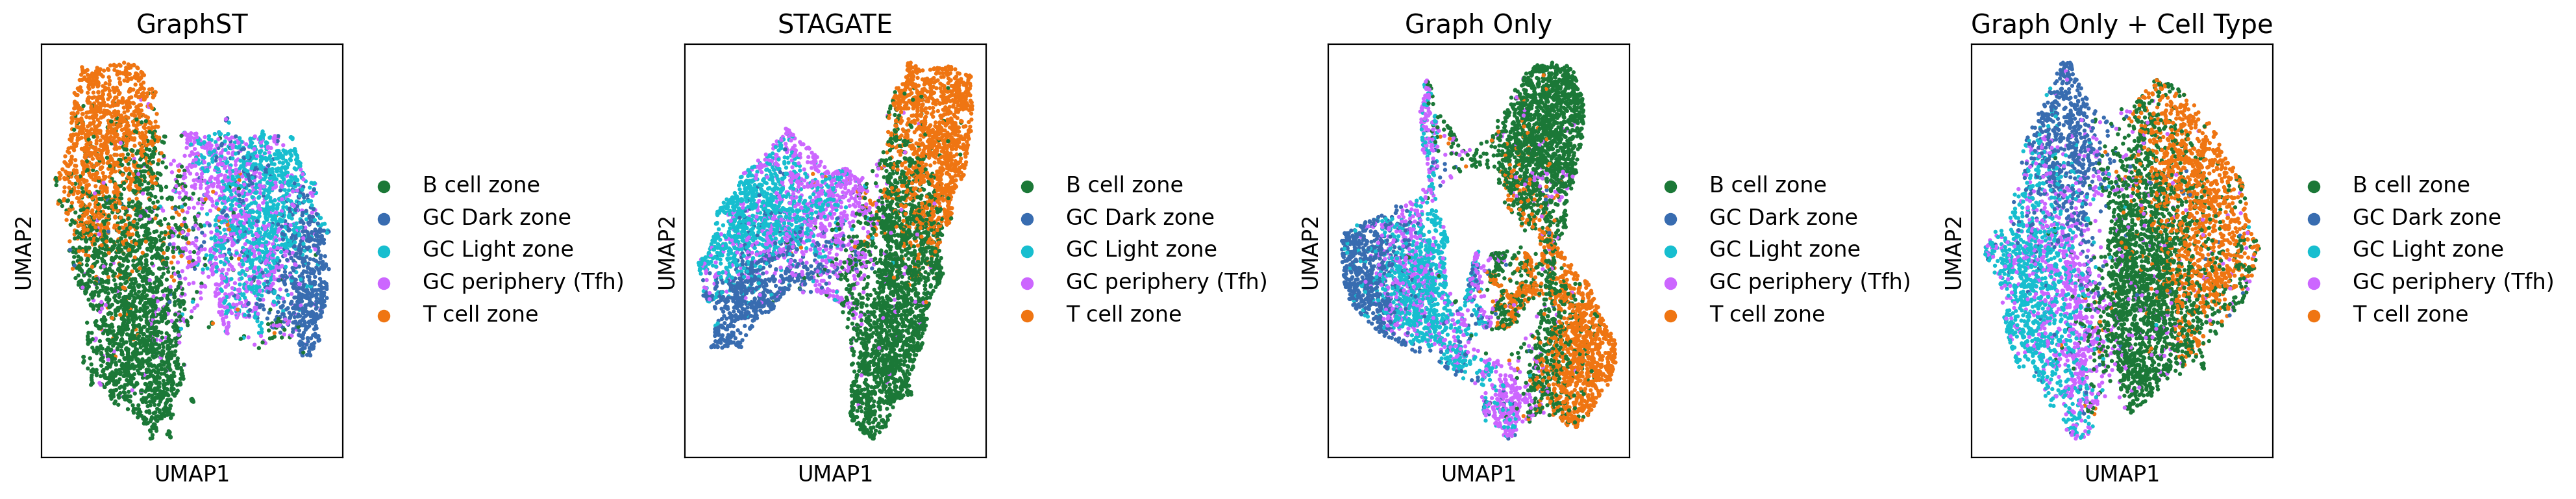

In [54]:
adata.uns['SIMVI niche_colors'] = ['#1b7837', '#386cb0', '#17becf', '#CC66FF', '#EF7512']

fig, axes = plt.subplots(1,4,figsize=(20,4))

sc.pp.neighbors(adata,use_rep='GraphST0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='GraphST',show=False,ax=axes[0])

sc.pp.neighbors(adata,use_rep='STAGATE0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='STAGATE',show=False,ax=axes[1])

sc.pp.neighbors(adata,use_rep='simvigo_s0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='Graph Only',show=False,ax=axes[2])

sc.pp.neighbors(adata,use_rep='simvigoct_s0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='Graph Only + Cell Type',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_simviniche_comparison2.pdf')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


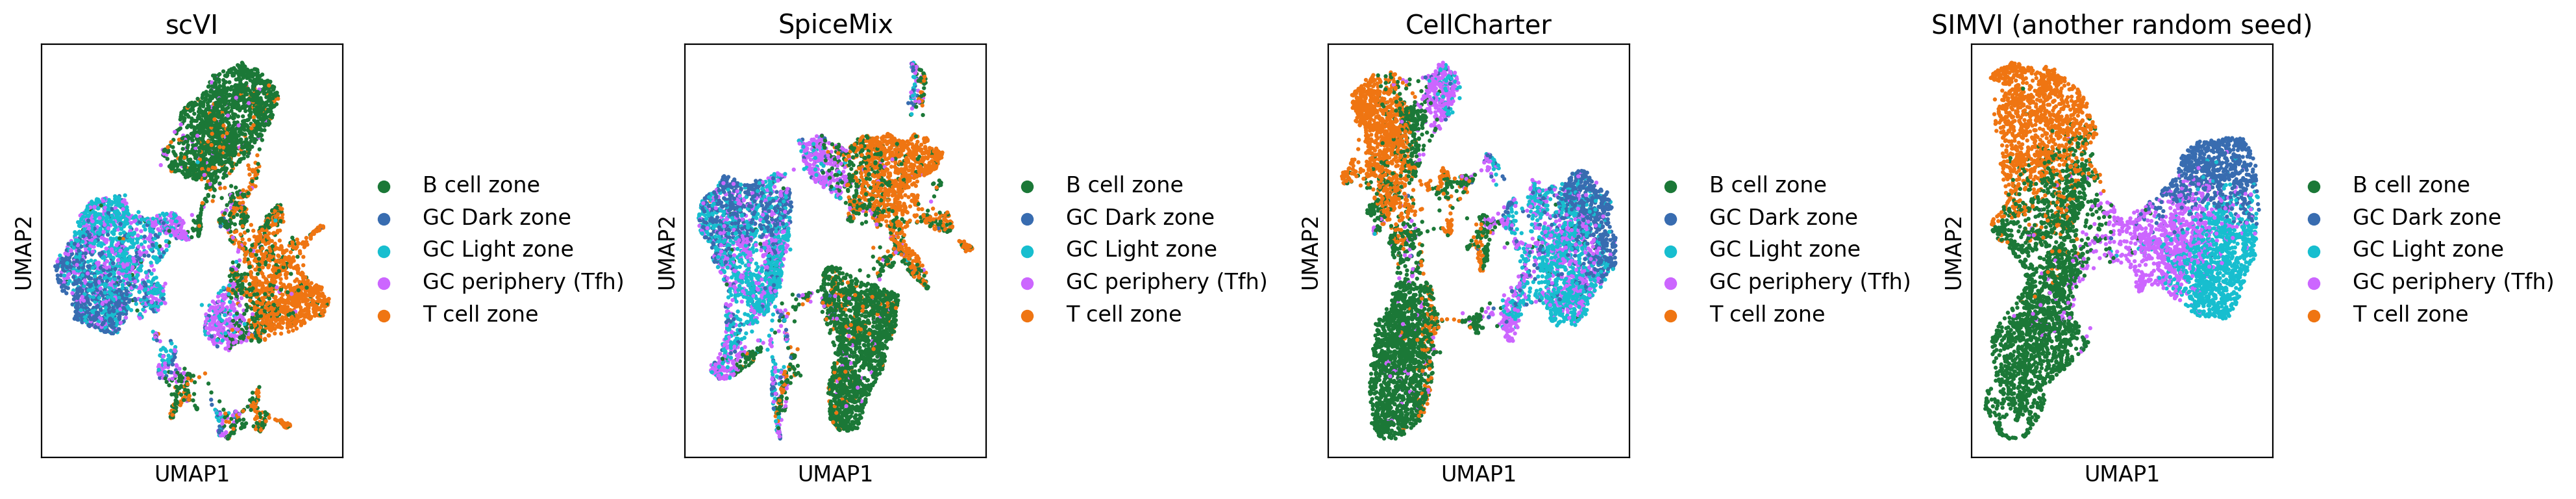

In [53]:
fig, axes = plt.subplots(1,4,figsize=(20,4))

sc.pp.neighbors(adata,use_rep='scvi0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='scVI',show=False,ax=axes[0])

sc.pp.neighbors(adata,use_rep='spicemix0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='SpiceMix',show=False,ax=axes[1])

sc.pp.neighbors(adata,use_rep='cellcharter0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='CellCharter',show=False,ax=axes[2])

sc.pp.neighbors(adata,use_rep='simvi_s0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='SIMVI niche',title='SIMVI (another random seed)',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_simviniche_comparison.pdf')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


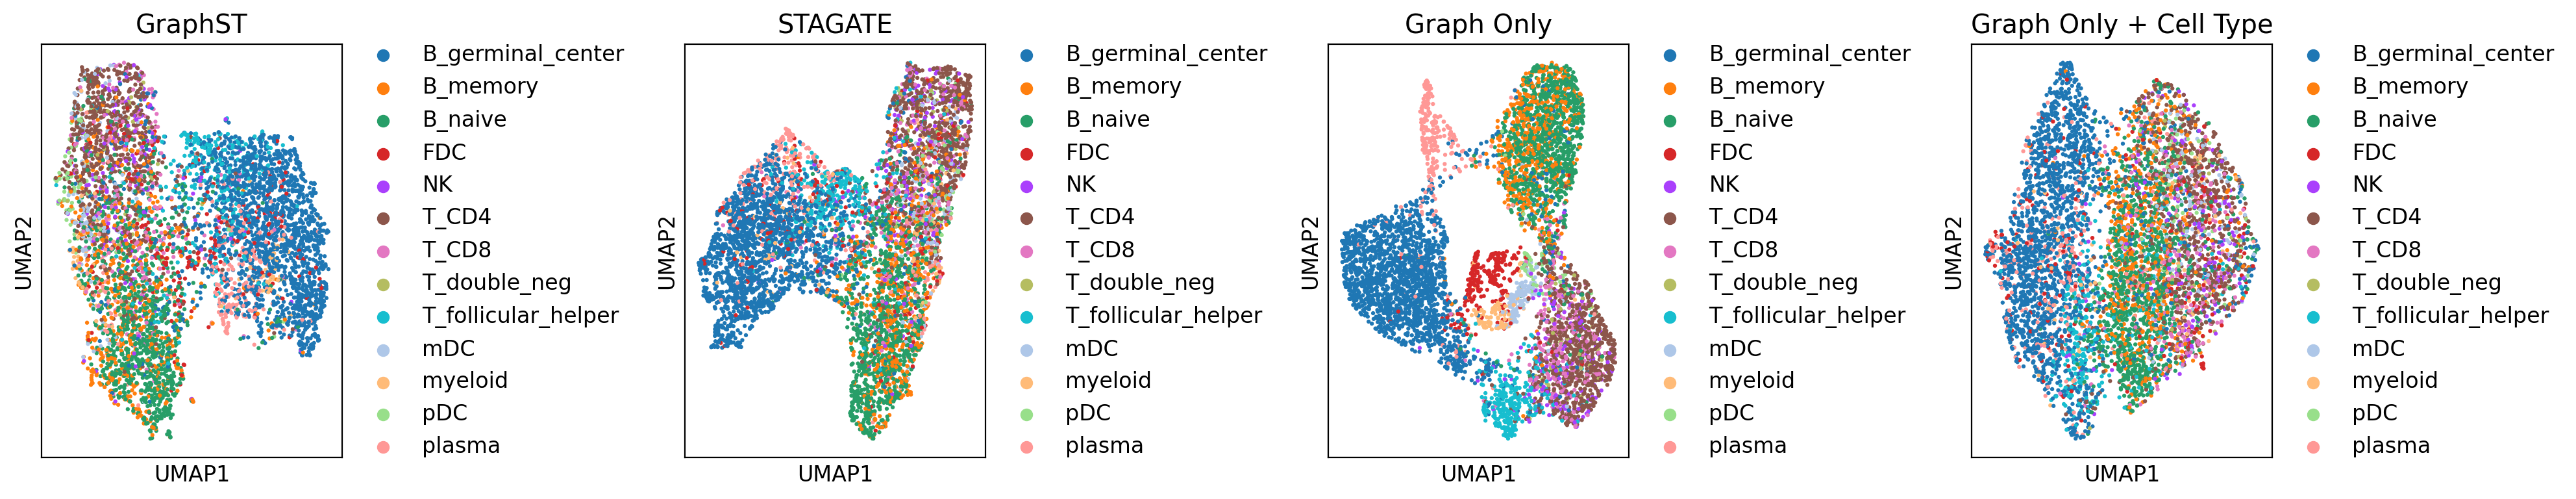

In [51]:
#adata.uns['SIMVI niche_colors'] = ['#1b7837', '#386cb0', '#17becf', '#CC66FF', '#EF7512']

fig, axes = plt.subplots(1,4,figsize=(20,4))

sc.pp.neighbors(adata,use_rep='GraphST0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='GraphST',show=False,ax=axes[0])

sc.pp.neighbors(adata,use_rep='STAGATE0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='STAGATE',show=False,ax=axes[1])

sc.pp.neighbors(adata,use_rep='simvigo_s0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='Graph Only',show=False,ax=axes[2])

sc.pp.neighbors(adata,use_rep='simvigoct_s0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='Graph Only + Cell Type',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_ct_comparison2.pdf')

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


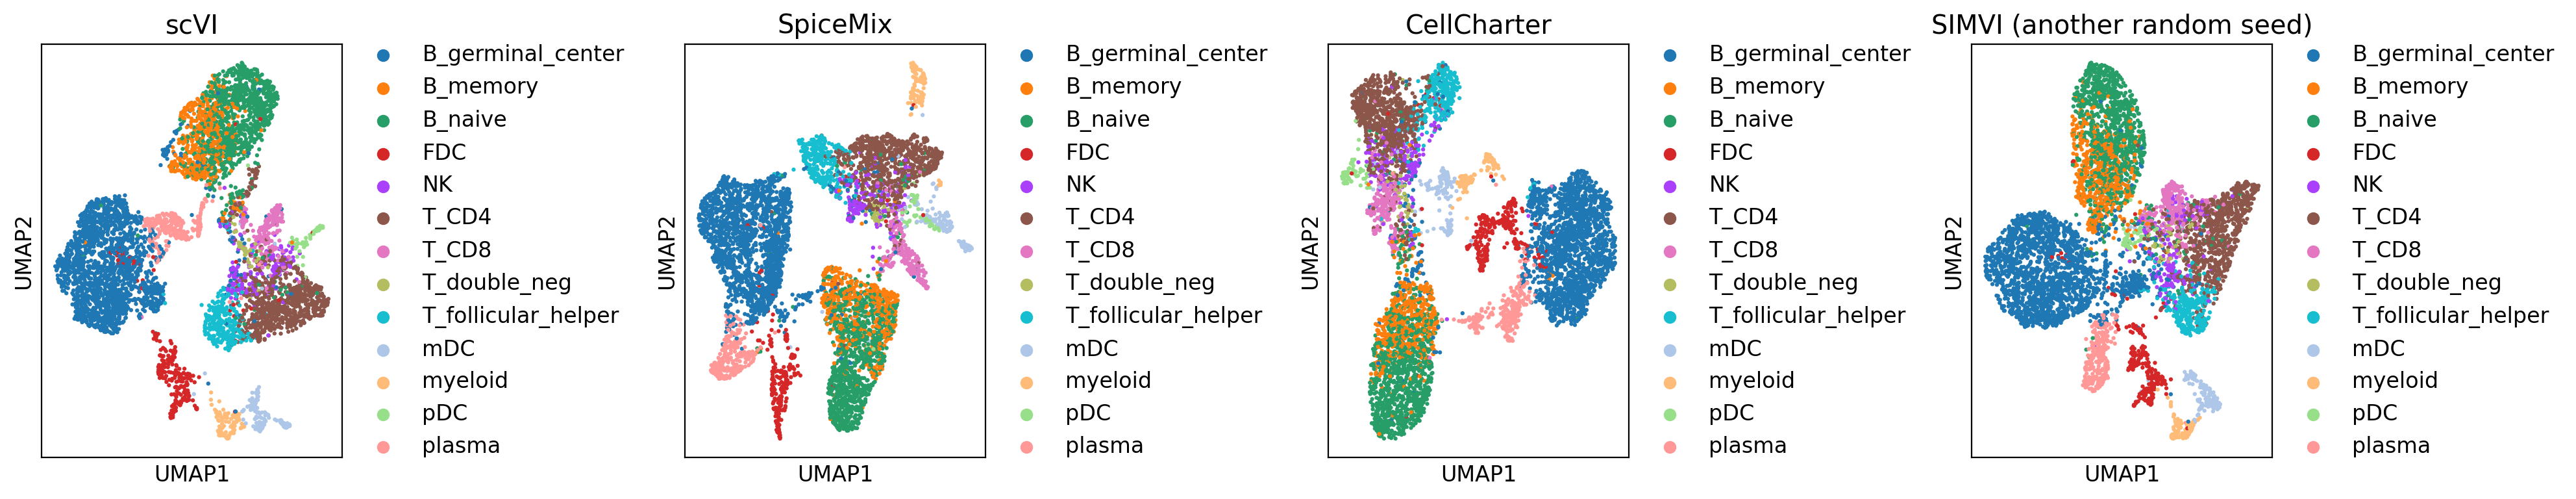

In [52]:
fig, axes = plt.subplots(1,4,figsize=(20,4))

sc.pp.neighbors(adata,use_rep='scvi0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='scVI',show=False,ax=axes[0])

sc.pp.neighbors(adata,use_rep='spicemix0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='SpiceMix',show=False,ax=axes[1])

sc.pp.neighbors(adata,use_rep='cellcharter0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='CellCharter',show=False,ax=axes[2])

sc.pp.neighbors(adata,use_rep='simvi_z0')
sc.tl.umap(adata)
sc.pl.umap(adata,color='cell_type',title='SIMVI (another random seed)',show=False,ax=axes[3])

plt.tight_layout()
plt.savefig('figures/umapslidetag_ct_comparison.pdf')